In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
labels = {
    0: "Acetaminophen",
    1: "Flixonase",
    2: "Dorixina",
    3: "Paracetamol",
    4: "Panadol Night"
}

In [33]:
df = pd.read_csv("/home/michel/Desktop/MobileDev/HospiApp/MobileDev/data/medicament.csv")

In [34]:
df.head()

,photo,label
0,0.png,0
1,1.png,0
2,2.png,0
3,3.png,0
4,4.png,0


In [3]:
path = "/home/michel/Desktop/MobileDev/HospiApp/MobileDev/medicaments"
img ="133.jpeg"
medi_listdir = os.listdir(path)

In [36]:
df.at[16, 'label']

0

In [89]:
a = 0
data_sample = []
for img1 in medi_listdir:
    index = int(img1[:-5])
    label = df.at[index, 'label']
    img_array = cv2.imread(os.path.join(path,img1))    
    new_array = cv2.resize(img_array,(150,150))
    data_sample.append((new_array, label))
    print(img1)

16.jpeg
192.jpeg
92.jpeg
184.jpeg
134.jpeg
44.jpeg
93.jpeg
118.jpeg
90.jpeg
54.jpeg
148.jpeg
139.jpeg
119.jpeg
58.jpeg
175.jpeg
56.jpeg
83.jpeg
153.jpeg
116.jpeg
75.jpeg
52.jpeg
28.jpeg
196.jpeg
176.jpeg
35.jpeg
61.jpeg
135.jpeg
29.jpeg
48.jpeg
63.jpeg
161.jpeg
110.jpeg
143.jpeg
195.jpeg
11.jpeg
0.jpeg
59.jpeg
159.jpeg
111.jpeg
34.jpeg
43.jpeg
138.jpeg
171.jpeg
125.jpeg
39.jpeg
95.jpeg
129.jpeg
158.jpeg
70.jpeg
23.jpeg
146.jpeg
185.jpeg
45.jpeg
94.jpeg
66.jpeg
144.jpeg
64.jpeg
186.jpeg
14.jpeg
127.jpeg
188.jpeg
69.jpeg
157.jpeg
87.jpeg
177.jpeg
78.jpeg
86.jpeg
149.jpeg
5.jpeg
31.jpeg
88.jpeg
96.jpeg
8.jpeg
180.jpeg
4.jpeg
98.jpeg
152.jpeg
40.jpeg
108.jpeg
113.jpeg
91.jpeg
132.jpeg
179.jpeg
193.jpeg
133.jpeg
169.jpeg
102.jpeg
76.jpeg
24.jpeg
142.jpeg
33.jpeg
2.jpeg
17.jpeg
130.jpeg
145.jpeg
77.jpeg
3.jpeg
121.jpeg
60.jpeg
41.jpeg
74.jpeg
147.jpeg
57.jpeg
37.jpeg
170.jpeg
1.jpeg
71.jpeg
51.jpeg
164.jpeg
123.jpeg
166.jpeg
89.jpeg
105.jpeg
183.jpeg
32.jpeg
154.jpeg
100.jpeg
27.jpeg
73.jpeg

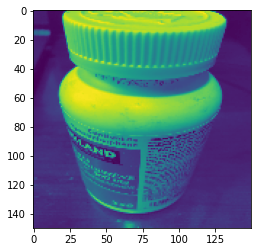

In [90]:
plt.imshow(X_test[1])
plt.show()

In [91]:
labels[np.argmax(Y_test[1])]

'Acetaminophen'

In [92]:
import random
random.shuffle(data_sample)
random.shuffle(data_sample)

In [122]:
from sklearn.model_selection import train_test_split
data_sample_train, data_sample_test = train_test_split(data_sample, test_size=0.1, random_state=42, shuffle=True)
data_sample_train[0:5]

[(array([[[221, 175, 138],
          [216, 171, 134],
          [220, 175, 137],
          ...,
          [ 13,   9,  24],
          [ 17,  12,  27],
          [ 16,  11,  26]],
  
         [[255, 255, 223],
          [255, 253, 222],
          [255, 252, 221],
          ...,
          [ 11,  10,  24],
          [ 11,  11,  25],
          [ 12,  12,  26]],
  
         [[255, 255, 246],
          [255, 255, 246],
          [255, 255, 247],
          ...,
          [ 10,  10,  24],
          [ 12,  12,  26],
          [ 11,  11,  25]],
  
         ...,
  
         [[ 24,  37,  89],
          [ 27,  40,  92],
          [ 23,  36,  88],
          ...,
          [ 12,  32,  80],
          [ 14,  34,  82],
          [ 10,  30,  78]],
  
         [[ 20,  34,  87],
          [ 22,  36,  88],
          [ 18,  32,  84],
          ...,
          [ 10,  31,  80],
          [ 13,  35,  83],
          [ 15,  37,  85]],
  
         [[ 28,  42,  95],
          [ 22,  36,  89],
          [ 24,  38,  91

In [123]:
X_train = []
X_test = []
Y_train = []
Y_test = []
for i in data_sample_train:
    X_train.append(i[0])
    Y_train.append(i[1])

for i in data_sample_test:
    X_test.append(i[0])
    Y_test.append(i[1])

In [124]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Y_train[:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [125]:
X_train = np.array(X_train).reshape(-1 , 150 , 150 , 3 )
X_test = np.array(X_test).reshape(-1 , 150 , 150 , 3 )
X_test[0:5]

array([[[[103,  92, 112],
         [102,  91, 111],
         [ 94,  88, 107],
         ...,
         [  6,  14,  44],
         [  5,  15,  45],
         [  8,  18,  48]],

        [[104,  93, 113],
         [103,  92, 112],
         [ 97,  91, 110],
         ...,
         [  7,  15,  45],
         [  8,  16,  46],
         [  9,  17,  47]],

        [[104,  93, 113],
         [103,  92, 112],
         [ 98,  90, 110],
         ...,
         [  7,  15,  45],
         [  9,  15,  45],
         [ 10,  16,  47]],

        ...,

        [[ 38,  53, 115],
         [ 41,  56, 118],
         [ 36,  51, 116],
         ...,
         [  7,  18,  53],
         [  6,  17,  52],
         [  6,  17,  52]],

        [[ 27,  44, 107],
         [ 32,  49, 112],
         [ 32,  49, 116],
         ...,
         [  7,  18,  50],
         [  5,  16,  48],
         [  6,  17,  49]],

        [[ 41,  58, 125],
         [ 41,  58, 125],
         [ 41,  62, 130],
         ...,
         [  7,  18,  48],
        

In [126]:
training_size = X_train.shape[0]

In [127]:
X_train.shape[1:]

(150, 150, 3)

In [128]:
import tensorflow as tf 
from keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, concatenate, Activation, BatchNormalization
from tensorflow.keras.layers import Embedding, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import TensorBoard
from keras.preprocessing import sequence

In [129]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , input_shape= X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64 , (3,3) , input_shape= X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_30 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_31 (Activation)   (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 82944)            

In [130]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [131]:
model.fit(X_train, Y_train, epochs = 20, batch_size=64)

Epoch 1/20
3/3 [==============================] - 1s 347ms/step - loss: 549.7513 - accuracy: 0.2416
Epoch 2/20
3/3 [==============================] - 1s 347ms/step - loss: 302.2397 - accuracy: 0.2921
Epoch 3/20
3/3 [==============================] - 1s 342ms/step - loss: 45.9896 - accuracy: 0.5056
Epoch 4/20
3/3 [==============================] - 1s 341ms/step - loss: 10.4536 - accuracy: 0.5955
Epoch 5/20
3/3 [==============================] - 1s 341ms/step - loss: 5.9082 - accuracy: 0.6573
Epoch 6/20
3/3 [==============================] - 1s 340ms/step - loss: 2.3736 - accuracy: 0.6292
Epoch 7/20
3/3 [==============================] - 1s 339ms/step - loss: 3.4194 - accuracy: 0.6742
Epoch 8/20
3/3 [==============================] - 1s 338ms/step - loss: 0.7426 - accuracy: 0.7921
Epoch 9/20
3/3 [==============================] - 1s 340ms/step - loss: 0.9228 - accuracy: 0.8146
Epoch 10/20
3/3 [==============================] - 1s 338ms/step - loss: 0.4419 - accuracy: 0.7978
Epoch 11/20
3

In [132]:
loss, acc = model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.1325 - accuracy: 0.9000


In [133]:
X_test

array([[[[103,  92, 112],
         [102,  91, 111],
         [ 94,  88, 107],
         ...,
         [  6,  14,  44],
         [  5,  15,  45],
         [  8,  18,  48]],

        [[104,  93, 113],
         [103,  92, 112],
         [ 97,  91, 110],
         ...,
         [  7,  15,  45],
         [  8,  16,  46],
         [  9,  17,  47]],

        [[104,  93, 113],
         [103,  92, 112],
         [ 98,  90, 110],
         ...,
         [  7,  15,  45],
         [  9,  15,  45],
         [ 10,  16,  47]],

        ...,

        [[ 38,  53, 115],
         [ 41,  56, 118],
         [ 36,  51, 116],
         ...,
         [  7,  18,  53],
         [  6,  17,  52],
         [  6,  17,  52]],

        [[ 27,  44, 107],
         [ 32,  49, 112],
         [ 32,  49, 116],
         ...,
         [  7,  18,  50],
         [  5,  16,  48],
         [  6,  17,  49]],

        [[ 41,  58, 125],
         [ 41,  58, 125],
         [ 41,  62, 130],
         ...,
         [  7,  18,  48],
        

In [120]:
X_test.shape

(40, 150, 150, 3)

In [134]:
pred = model.predict(X_test)
pred

array([[5.9082814e-24, 0.0000000e+00, 0.0000000e+00, 1.9037014e-20,
        1.0000000e+00],
       [1.0516604e-28, 0.0000000e+00, 0.0000000e+00, 2.5714257e-25,
        1.0000000e+00],
       [1.1479428e-20, 2.0571378e-04, 9.9979430e-01, 4.0914567e-31,
        3.0770955e-10],
       [7.6528180e-01, 1.6064210e-02, 4.4581641e-02, 1.3137734e-01,
        4.2695072e-02],
       [3.7038787e-28, 0.0000000e+00, 0.0000000e+00, 4.8058890e-25,
        1.0000000e+00],
       [2.8670856e-01, 9.9406302e-02, 4.7553372e-02, 5.5563456e-01,
        1.0697220e-02],
       [2.3341513e-09, 2.4530198e-01, 7.5466150e-01, 4.1817049e-13,
        3.6525664e-05],
       [8.7634638e-34, 0.0000000e+00, 0.0000000e+00, 6.4690369e-30,
        1.0000000e+00],
       [9.3928397e-01, 8.7959626e-05, 3.6364442e-04, 2.4181224e-02,
        3.6083061e-02],
       [9.1794489e-17, 4.1237038e-07, 9.9999964e-01, 3.1345598e-25,
        1.2683035e-11],
       [6.3943762e-06, 2.9332165e-03, 9.0297952e-08, 9.9706024e-01,
        8.78

In [136]:
[np.argmax(pred[i]) for i in range(Y_test.shape[0])]

[4, 4, 2, 0, 4, 3, 2, 4, 0, 2, 3, 4, 3, 1, 2, 4, 1, 2, 4, 2]

In [163]:
pred = model.predict(new_array)
pred

array([[9.4170022e-01, 6.3047873e-06, 3.1400737e-05, 9.3051605e-03,
        4.8956856e-02]], dtype=float32)

In [7]:
pred = model.predict(new_array)
labels[np.argmax(pred[0])]

NameError: name 'model' is not defined

In [165]:
# serialize model to JSON
# model_json = model.to_json()
# with open("model/medicament_model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model/medicament_model.h5")
# print("Saved model to disk")

Saved model to disk


In [3]:
from keras.models import model_from_json

# load json and create model
json_file = open('model/medicament_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model/medicament_model.h5")
print("Loaded model from disk")

loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Loaded model from disk


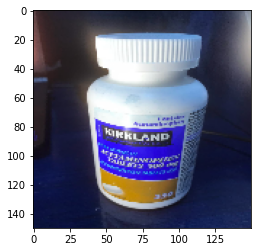

In [6]:
path = "/home/michel/Desktop/MobileDev/HospiApp/MobileDev/medicaments"
img ="198.jpeg"
img_array = cv2.imread(os.path.join(path,img))    
new_array = cv2.resize(img_array,(150,150))
plt.imshow(new_array)
plt.show()

In [7]:
new_array = new_array.reshape(1 , 150 , 150 , 3)

In [8]:
pred = loaded_model.predict(new_array)
labels[np.argmax(pred[0])]

'Acetaminophen'